In [1]:
import numpy as np
from nnfs.datasets import vertical_data, spiral_data
import matplotlib.pyplot as plt

In [2]:
# RELU Activation Function
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

In [3]:
# Softmax Activation Function
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

In [4]:
# Dense Layer Class
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.n_inputs = n_inputs
    self.n_neurons = n_neurons
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

In [5]:
class Loss:
    def calculate(self, y_pred, y_true):
        neg_loss_liklihoods = self.forward(y_pred, y_true)
        avg_loss = np.mean(neg_loss_liklihoods)
        return avg_loss

class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(len(y_pred_clipped)), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        neg_loss_liklihoods = -np.log(correct_confidences)

        return neg_loss_liklihoods

In [6]:
class Accuracy:
    def calculate(self, outputs, y_true):
        correct_perdictions = np.argmax(outputs, axis=1)
        class_targets = y_true

        if len(y_true.shape) == 2:
            class_targets = np.argmax(y_true, axis=1)

        accuracy = np.mean(correct_perdictions == class_targets)

        return accuracy

# Strategy 1: Randomly select weights and biases

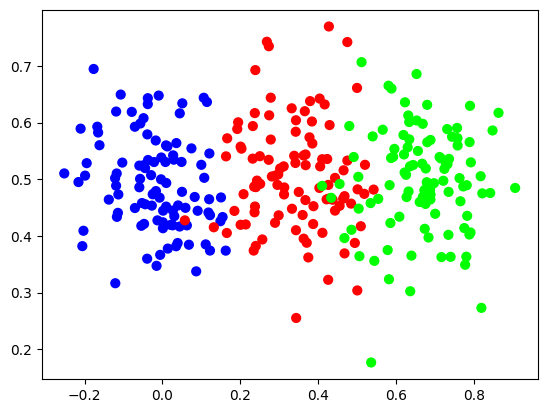

In [7]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [8]:
layer1 = Layer_Dense(2, 3)
activation_relu = Activation_ReLU()

layer2 = Layer_Dense(3, 3)
activation_softmax = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()
accuracy_function = Accuracy()

best_weights_layer1 = layer1.weights.copy()
best_biases_layer1 = layer1.biases.copy()
best_weights_layer2 = layer2.weights.copy()
best_biases_layer2 = layer2.biases.copy()

lowest_loss = 999999 # some random initial value

for i in range(100000):
    layer1.weights = 0.005 * np.random.randn(2, 3)
    layer1.biases = 0.005 * np.random.randn(1, 3)
    layer2.weights = 0.005 * np.random.randn(3, 3)
    layer2.biases = 0.005 * np.random.randn(1, 3)

    layer1.forward(X)
    activation_relu.forward(layer1.output)
    layer2.forward(activation_relu.output)
    activation_softmax.forward(layer2.output)

    loss = loss_function.calculate(activation_softmax.output, y)
    accuracy = accuracy_function.calculate(activation_softmax.output, y)

    if loss < lowest_loss:
        print("New set of weights found, iteration:", i, "loss: ", loss, "accuracy: ", accuracy)
        best_weights_layer1 = layer1.weights
        best_biases_layer1 = layer1.biases
        best_weights_layer2 = layer2.weights
        best_biases_layer2 = layer2.biases
        lowest_loss = loss

print("Best pair of weights and biases found with the lowest loss")

New set of weights found, iteration: 0 loss:  1.0986026067094796 accuracy:  0.3333333333333333
New set of weights found, iteration: 105 loss:  1.0985984744546904 accuracy:  0.3333333333333333
New set of weights found, iteration: 925 loss:  1.098596361228358 accuracy:  0.3333333333333333
New set of weights found, iteration: 1982 loss:  1.0985961626485377 accuracy:  0.3333333333333333
New set of weights found, iteration: 2173 loss:  1.0985958942510756 accuracy:  0.3333333333333333
New set of weights found, iteration: 2471 loss:  1.0985930788756781 accuracy:  0.3333333333333333
New set of weights found, iteration: 3098 loss:  1.0985919190725673 accuracy:  0.3333333333333333
New set of weights found, iteration: 4285 loss:  1.098589802244116 accuracy:  0.3333333333333333
New set of weights found, iteration: 5828 loss:  1.098587622439281 accuracy:  0.3333333333333333
New set of weights found, iteration: 9048 loss:  1.0985762865388775 accuracy:  0.33666666666666667
New set of weights found, i

# Strategy 2: Randomly adjust weights and biases

In [9]:
# Trying this strategy in virtical dataset
layer1 = Layer_Dense(2, 3)
activation_relu = Activation_ReLU()

layer2 = Layer_Dense(3, 3)
activation_softmax = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()
accuracy_function = Accuracy()

best_weights_layer1 = layer1.weights.copy()
best_biases_layer1 = layer1.biases.copy()
best_weights_layer2 = layer2.weights.copy()
best_biases_layer2 = layer2.biases.copy()

lowest_loss = 999999 # some random initial value

for i in range(100000):
    layer1.weights += 0.05 * np.random.randn(2, 3)
    layer1.biases += 0.05 * np.random.randn(1, 3)
    layer2.weights += 0.05 * np.random.randn(3, 3)
    layer2.biases += 0.05 * np.random.randn(1, 3)

    layer1.forward(X)
    activation_relu.forward(layer1.output)
    layer2.forward(activation_relu.output)
    activation_softmax.forward(layer2.output)

    loss = loss_function.calculate(activation_softmax.output, y)
    accuracy = accuracy_function.calculate(activation_softmax.output, y)

    if loss < lowest_loss:
        print("New set of weights found, iteration:", i, "loss: ", loss, "accuracy: ", accuracy)
        best_weights_layer1 = layer1.weights
        best_biases_layer1 = layer1.biases
        best_weights_layer2 = layer2.weights
        best_biases_layer2 = layer2.biases
        lowest_loss = loss
    else:
        layer1.weights = best_weights_layer1.copy()
        layer1.biases = best_biases_layer1.copy()
        layer2.weights = best_weights_layer2.copy()
        layer2.biases = best_biases_layer2.copy()

print("Best pair of weights and biases found with the lowest loss")

New set of weights found, iteration: 0 loss:  1.100829661314438 accuracy:  0.3333333333333333
New set of weights found, iteration: 3 loss:  1.0999065037728155 accuracy:  0.3333333333333333
New set of weights found, iteration: 4 loss:  1.0997462374992635 accuracy:  0.3333333333333333
New set of weights found, iteration: 12 loss:  1.0994214914069718 accuracy:  0.3333333333333333
New set of weights found, iteration: 13 loss:  1.0985499146525088 accuracy:  0.3333333333333333
New set of weights found, iteration: 23 loss:  1.097405470288117 accuracy:  0.3333333333333333
New set of weights found, iteration: 25 loss:  1.0972592927403917 accuracy:  0.3333333333333333
New set of weights found, iteration: 26 loss:  1.0969709920190396 accuracy:  0.3333333333333333
New set of weights found, iteration: 45 loss:  1.0966029149113585 accuracy:  0.3333333333333333
New set of weights found, iteration: 51 loss:  1.095130104022349 accuracy:  0.3333333333333333
New set of weights found, iteration: 52 loss: 

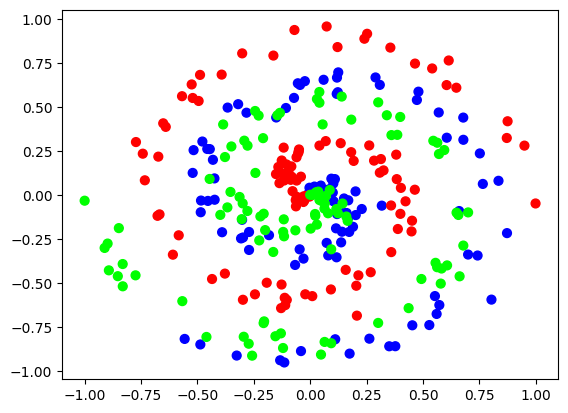

In [28]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [31]:
# Trying this strategy in spiral dataset (more complex dataset)
layer1 = Layer_Dense(2, 3)
activation_relu = Activation_ReLU()

layer2 = Layer_Dense(3, 3)
activation_softmax = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()
accuracy_function = Accuracy()

best_weights_layer1 = layer1.weights.copy()
best_biases_layer1 = layer1.biases.copy()
best_weights_layer2 = layer2.weights.copy()
best_biases_layer2 = layer2.biases.copy()

lowest_loss = 999999 # some random initial value

for i in range(1000000):
    layer1.weights += 0.005 * np.random.randn(2, 3)
    layer1.biases += 0.005 * np.random.randn(1, 3)
    layer2.weights += 0.005 * np.random.randn(3, 3)
    layer2.biases += 0.005 * np.random.randn(1, 3)

    layer1.forward(X)
    activation_relu.forward(layer1.output)
    layer2.forward(activation_relu.output)
    activation_softmax.forward(layer2.output)

    loss = loss_function.calculate(activation_softmax.output, y)
    accuracy = accuracy_function.calculate(activation_softmax.output, y)

    if loss < lowest_loss:
        print("New set of weights found, iteration:", i, "loss: ", loss, "accuracy: ", accuracy)
        best_weights_layer1 = layer1.weights
        best_biases_layer1 = layer1.biases
        best_weights_layer2 = layer2.weights
        best_biases_layer2 = layer2.biases
        lowest_loss = loss
    else:
        layer1.weights = best_weights_layer1.copy()
        layer1.biases = best_biases_layer1.copy()
        layer2.weights = best_weights_layer2.copy()
        layer2.biases = best_biases_layer2.copy()

print("Best pair of weights and biases found with the lowest loss")

New set of weights found, iteration: 0 loss:  1.0986406126272996 accuracy:  0.3333333333333333
New set of weights found, iteration: 56 loss:  1.0986400466220354 accuracy:  0.3333333333333333
New set of weights found, iteration: 57 loss:  1.098623269085423 accuracy:  0.2966666666666667
New set of weights found, iteration: 64 loss:  1.098621942556787 accuracy:  0.3333333333333333
New set of weights found, iteration: 70 loss:  1.098620833973183 accuracy:  0.3333333333333333
New set of weights found, iteration: 78 loss:  1.0986159473129709 accuracy:  0.3333333333333333
New set of weights found, iteration: 79 loss:  1.0986136241268487 accuracy:  0.3333333333333333
New set of weights found, iteration: 95 loss:  1.0986123895829802 accuracy:  0.3333333333333333
New set of weights found, iteration: 110 loss:  1.0986121370368438 accuracy:  0.3333333333333333
New set of weights found, iteration: 114 loss:  1.0986070032971218 accuracy:  0.3333333333333333
New set of weights found, iteration: 115 l